# Task1: Data Cleaning and Preprocessing
### Dataset Description:
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

### Task Overview:
Your task is to perform the following operations:

### Data Loading: Load the dataset (https://archive.ics.uci.edu/dataset/502/online+retail+ii) into a Pandas DataFrame.

### Initial Exploration:

Check for missing values and handle them appropriately
Explore basic statistics (mean, median, min, max, etc.) for numerical columns.
Explore categorical variables (unique values, value counts).

### Data Cleaning:

Handle duplicate records if any.
Clean data inconsistencies, such as inconsistent capitalization or formatting issues in categorical columns.
Remove outliers in numerical columns if necessary (using statistical methods or domain knowledge).


### Data Preparation:

Split the dataset into training and testing sets for machine learning models.

### Visualization:

Visualize relationships between features (e.g., correlation matrix, scatter plots).




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
print("DataFrame shape: ",df.shape)

DataFrame shape:  (525461, 8)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [ ]:
df["Customer ID"] = df["Customer ID"].astype(str)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [ ]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object

In [ ]:
df["InvoiceDate"]

0        2009-12-01 07:45:00
1        2009-12-01 07:45:00
2        2009-12-01 07:45:00
3        2009-12-01 07:45:00
4        2009-12-01 07:45:00
                 ...        
525456   2010-12-09 20:01:00
525457   2010-12-09 20:01:00
525458   2010-12-09 20:01:00
525459   2010-12-09 20:01:00
525460   2010-12-09 20:01:00
Name: InvoiceDate, Length: 525461, dtype: datetime64[ns]

In [ ]:
df.describe() #basic statistics

,Quantity,InvoiceDate,Price
count,525461.000000,525461,525461.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834
min,-9600.000000,2009-12-01 07:45:00,-53594.360000
25%,1.000000,2010-03-21 12:20:00,1.250000
50%,3.000000,2010-07-06 09:51:00,2.100000
75%,10.000000,2010-10-15 12:45:00,4.210000
max,19152.000000,2010-12-09 20:01:00,25111.090000
std,107.424110,NaN,146.126914


In [ ]:
df.isnull().sum() #there is missing values

Invoice           0
StockCode         0
Description    2928
Quantity          0
InvoiceDate       0
Price             0
Customer ID       0
Country           0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum() #now it is removed

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
df.duplicated().sum() #there is duplicate values

6865

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum() # now there is no duplicated

0

In [ ]:
df =df[~df["Invoice"].str.contains("C",na=False)] #remove the canceled products

In [ ]:
#for col in df.columns:
#  print(f"{col}: {df[col].unique()}")

categorical data

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta',
       'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore', 'Thailand',
       'Israel', 'Lithuania', 'West Indies', 'Lebanon', 'Korea', 'Brazil',
       'Canada', 'Iceland'], dtype=object)

In [ ]:
df['Country'].value_counts()

Country
United Kingdom          467348
EIRE                      9451
Germany                   7652
France                    5514
Netherlands               2729
Spain                     1228
Switzerland               1170
Portugal                  1058
Belgium                   1037
Sweden                     886
Channel Islands            821
Italy                      708
Australia                  630
Cyprus                     533
Austria                    524
Greece                     512
Denmark                    418
United Arab Emirates       399
Norway                     365
Finland                    347
Unspecified                306
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
RSA                        110
Bahrain                    106
Canada                      77
Thailand                    76
Hong Kong                   74


In [ ]:
df['Description'].unique()

array(['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS',
       ' WHITE CHERRY LIGHTS', ..., '*Boombox Ipod Classic', 'faulty',
       'Dotcom sales'], dtype=object)

In [ ]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    3410
REGENCY CAKESTAND 3 TIER              2036
STRAWBERRY CERAMIC TRINKET BOX        1679
ASSORTED COLOUR BIRD ORNAMENT         1436
PACK OF 72 RETRO SPOT CAKE CASES      1435
                                      ... 
LARGE HANGING GLASS+ZINC LANTERN         1
bad quality                              1
17129c                                   1
wrong invc                               1
MIRROR, ARCHED GEORGIAN                  1
Name: count, Length: 4666, dtype: int64

In [ ]:
df['Description'] = df['Description'].str.lower()

In [ ]:
df['Description']

0         15cm christmas glass ball 20 lights
1                          pink cherry lights
2                         white cherry lights
3                record frame 7" single size 
4              strawberry ceramic trinket box
                         ...                 
525456                   feltcraft doll rosie
525457           feltcraft princess lola doll
525458         feltcraft princess olivia doll
525459     pink floral feltcraft shoulder bag
525460                 jumbo storage bag suki
Name: Description, Length: 505486, dtype: object

In [ ]:
print(df['Price'].min()) #lowest price
print(df['Price'].max()) #highest price

-53594.36
25111.09


In [ ]:
(df["Price"] <= 0).mean() * 100 #percentage of negative prices

0.14955903823251288

In [ ]:
(df["Quantity"] <= 0).mean() * 100


0.058161848201532786

In [ ]:
df["Total"] = df["Quantity"] * df["Price"]


In [ ]:
(df["Total"] <= 0).mean() * 100

0.14955903823251288

In [ ]:
most_order=df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()
most_order

,Quantity
Description,
white hanging heart t-light holder,58692
world war 2 gliders asstd designs,55058
brocade ring purse,48384
pack of 72 retro spot cake cases,46728
assorted colour bird ornament,45236


In [ ]:
df[df["Total"] >  0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,feltcraft doll rosie,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,feltcraft princess lola doll,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,feltcraft princess olivia doll,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,pink floral feltcraft shoulder bag,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [ ]:
#remove outliers
#splut data
#visualztion

In [ ]:
# Attempt to convert relevant columns to numeric, coercing errors to NaN
df2=df.copy()
df2=df2.drop(["Description","Country"], axis=1)
numeric_df = df2.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix on the numeric DataFrame
correlation_matrix = numeric_df.corr()
correlation_matrix

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Total
Invoice,1.000000,-0.085021,-0.006200,0.996546,-0.001855,0.019762,0.000482
StockCode,-0.085021,1.000000,0.011387,-0.085267,0.024075,0.018853,0.016624
Quantity,-0.006200,0.011387,1.000000,-0.005049,-0.002038,-0.014566,0.189674
InvoiceDate,0.996546,-0.085267,-0.005049,1.000000,-0.001210,0.016650,0.000518
Price,-0.001855,0.024075,-0.002038,-0.001210,1.000000,-0.005832,0.891822
Customer ID,0.019762,0.018853,-0.014566,0.016650,-0.005832,1.000000,-0.014977
Total,0.000482,0.016624,0.189674,0.000518,0.891822,-0.014977,1.000000


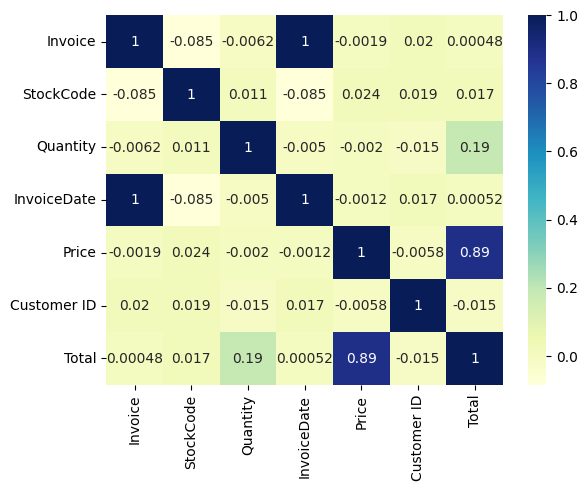

In [ ]:
import seaborn as sb
dataplot = sb.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
target = df.iloc[:, 7]
data = df.drop(df.columns[7], axis=1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.3)
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(353840, 8) (353840,) (151646, 8) (151646,)
